In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
CBSAair = pd.read_csv("annual_aqi_by_cbsa_2017.csv")
TXair=CBSAair[CBSAair["CBSA"].str.contains(", TX")]
TXair = TXair.set_index('CBSA')


In [191]:
TXincome = pd.read_csv("income.csv")
TXincome = TXincome.drop(["GEO.id","GEO.id2","HD02_VD01"],axis=1)
TXincome = TXincome.drop([0,1],axis=0)
TXincome.columns = ["Geography", "Income"]
TXincome["Geography"] = TXincome["Geography"].str.split(' ').str[0:-3].str.join(' ')

In [192]:
TXrace = pd.read_csv("race.csv")
TXrace = TXrace.iloc[:,2:6]
TXrace = TXrace.drop([0,1],axis=0)
TXrace = TXrace.drop(["HD02_VD01"], axis =1)
TXrace.columns = ["Geography", "Population", "White"]
TXrace["Geography"] = TXrace["Geography"].str.split(' ').str[0:-3].str.join(' ')
TXrace = TXrace.set_index('Geography')
TXincome = TXincome.set_index('Geography')
TXdemo = TXrace.join(TXincome)
TXdemo = TXdemo.astype('int64')
TXdemo["Minority"] = 1 - TXdemo["White"]/TXdemo["Population"]

In [194]:
TX = TXair.join(TXdemo)
TX = TX.drop("Texarkana, TX-AR")

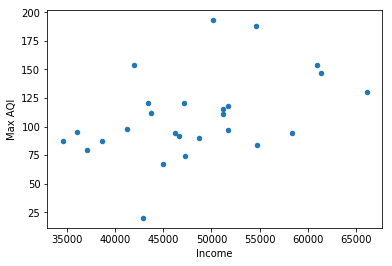

In [196]:
#pd.concat([TX["Median AQI"], TX["Income"]],axis = 1).plot()
TX.plot(x = "Income", y = "Max AQI", kind = 'scatter')#plt.ylabel('some numbers')
plt.show()

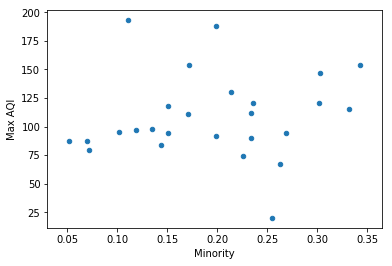

In [197]:
TX.plot(x = "Minority", y = "Max AQI", kind = 'scatter')#plt.ylabel('some numbers')
plt.show()